# Semi-supervised anomaly detection

In [23]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape
from keras.models import Model
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [24]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [26]:
train_5 = x_train[y_train == 5]
test_5 = x_test[y_test == 5]

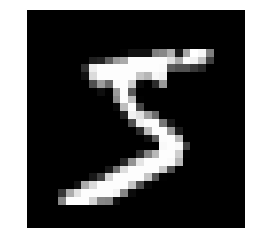

In [27]:
plt.axis("off")
plt.imshow(train_5[0,:,:,0])
plt.gray()
plt.show()

In [28]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)

x = Dense(14*14*16, activation='relu')(x)
encoded = Dense(100, activation='relu')(x)
x = Dense(14*14*16, activation='relu')(encoded)

x = Reshape((14,14,16))(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [33]:
checkpointer = ModelCheckpoint(filepath="weights_sign.hdf5", verbose=1, save_best_only=True, save_weights_only=True)

autoencoder.fit(train_5, train_5,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(test_5, test_5),
                callbacks=[checkpointer])

Train on 5421 samples, validate on 892 samples
Epoch 1/30
5421/5421 [==============================] - 40s - loss: 0.1846 - val_loss: 0.1858
Epoch 2/30
5421/5421 [==============================] - 44s - loss: 0.1813 - val_loss: 0.1838
Epoch 3/30
5421/5421 [==============================] - 41s - loss: 0.1757 - val_loss: 0.1757
Epoch 4/30
5421/5421 [==============================] - 43s - loss: 0.1719 - val_loss: 0.1779
Epoch 5/30
5421/5421 [==============================] - 37s - loss: 0.1693 - val_loss: 0.1669
Epoch 6/30
5421/5421 [==============================] - 38s - loss: 0.1646 - val_loss: 0.1642
Epoch 7/30
5421/5421 [==============================] - 37s - loss: 0.1606 - val_loss: 0.1598
Epoch 8/30
5421/5421 [==============================] - 37s - loss: 0.1579 - val_loss: 0.1559
Epoch 9/30
5421/5421 [==============================] - 38s - loss: 0.1525 - val_loss: 0.1498
Epoch 10/30
5421/5421 [==============================] - 38s - loss: 0.1529 - val_loss: 0.1502
Epoch 11/30


In [34]:
encoder = Model(input_img, encoded)
encoder_imgs = encoder.predict(x_test)

In [35]:
import numpy as np
from sklearn.manifold import TSNE
X = encoder_imgs
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(10000, 2)

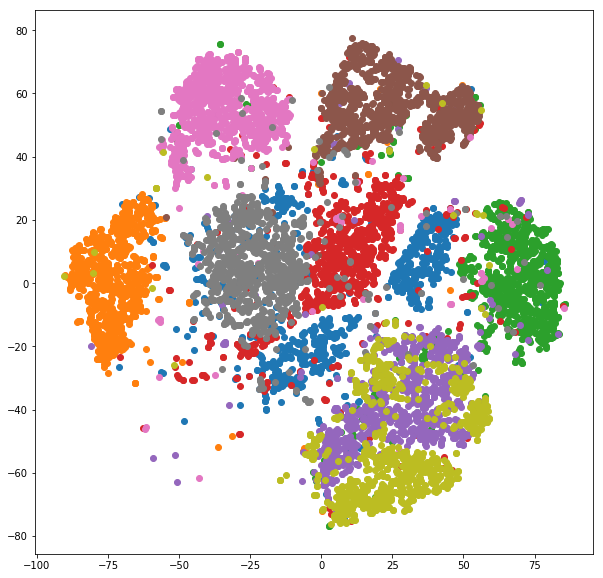

In [38]:
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[y_test==5, 0], X_embedded[y_test==5, 1], label='C1')
plt.scatter(X_embedded[y_test==6, 0], X_embedded[y_test==6, 1], label='C2')
plt.scatter(X_embedded[y_test==7, 0], X_embedded[y_test==7, 1], label='C3')
plt.scatter(X_embedded[y_test==8, 0], X_embedded[y_test==8, 1], label='C4')
plt.scatter(X_embedded[y_test==9, 0], X_embedded[y_test==9, 1], label='C5')
plt.scatter(X_embedded[y_test==1, 0], X_embedded[y_test==1, 1], label='C6')
plt.scatter(X_embedded[y_test==2, 0], X_embedded[y_test==2, 1], label='C7')
plt.scatter(X_embedded[y_test==3, 0], X_embedded[y_test==3, 1], label='C8')
plt.scatter(X_embedded[y_test==4, 0], X_embedded[y_test==4, 1], label='C9')

plt.show()